In [1]:
from data_utils.load_datasets import load_dataset

news_20 = load_dataset('20news')
imdb = load_dataset('imdb')

Loading dataset from folder
Loading dataset from folder


In [2]:
import torch
import numpy as np
from gensim.models.keyedvectors import Word2VecKeyedVectors
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


fasttext_vecs = Word2VecKeyedVectors.load_word2vec_format('data/wiki-news-300d-1M.vec')
# proc = PretrainedEmbeddingsProcessor(fasttext_vecs, 200, 10000)

/home/denis4/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
%load_ext autoreload

%autoreload 2

In [4]:
from models.LSTM import LSTMModel

232.84475


(array([7.700e+01, 7.770e+02, 9.170e+02, 1.130e+03, 2.918e+03, 2.834e+03,
        1.986e+03, 1.429e+03, 1.170e+03, 9.490e+02, 7.740e+02, 6.460e+02,
        5.550e+02, 4.830e+02, 4.380e+02, 3.200e+02, 2.990e+02, 2.560e+02,
        2.640e+02, 1.790e+02, 1.780e+02, 1.510e+02, 1.380e+02, 1.260e+02,
        1.060e+02, 1.020e+02, 9.300e+01, 7.800e+01, 7.600e+01, 5.800e+01,
        5.700e+01, 4.900e+01, 6.200e+01, 4.200e+01, 3.100e+01, 3.800e+01,
        3.100e+01, 2.400e+01, 3.900e+01, 5.500e+01, 4.700e+01, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

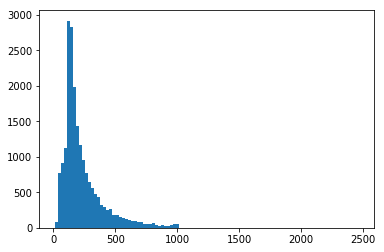

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

dataset = imdb
print(np.mean([len(x.split(" ")) for x in dataset.X_train.text]))
plt.hist([len(x.split(" ")) for x in dataset.X_train.text], bins=100)

In [6]:
dataset = imdb

config = LSTMModel.get_config_parameters()
config['num_classes'] = len(set(dataset.y_train.label))
config['hidden_dim'] = 32

# config['seq_length'] = max([len(x.split(" ")) for x in dataset.X_train.text])
print(config['seq_length'])
model_object = LSTMModel(config, fasttext_vecs)
print(model_object.train(dataset))

400


KeyboardInterrupt: 

In [9]:
tokenizer = RegexpTokenizer(r'(\w+|[\.\,\?]+)')
proc.fit(imdb.X_train.text.tolist())